In [29]:
%load_ext autoreload
%autoreload 2
from jax.random import split, PRNGKey
from jax import vmap
from aritmetic_bayesian_network import bayesian_network, InferenceForBayesianNetwork
from train_aritmetic_bayesian_network import initialize_model
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd
import numpy as onp

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [67]:
m_cfg = dict(
    key = PRNGKey(0),
    num_augments = 9,
    width_size = 128,
    num_blocks = 1,
    depth = 3,
)
m = initialize_model(
    model_cfg=m_cfg,
    load_idx=0,
    chkpt_folder="aritmetic_bayesian_chkpts/",
)

In [68]:
ks = split(PRNGKey(5327),20000)
*all_z_batches, x0_b, x1_b = vmap(bayesian_network)(ks[:10000])
all_z_batches_hat = vmap(m.rsample)(x0_b,x1_b,ks[10000:])

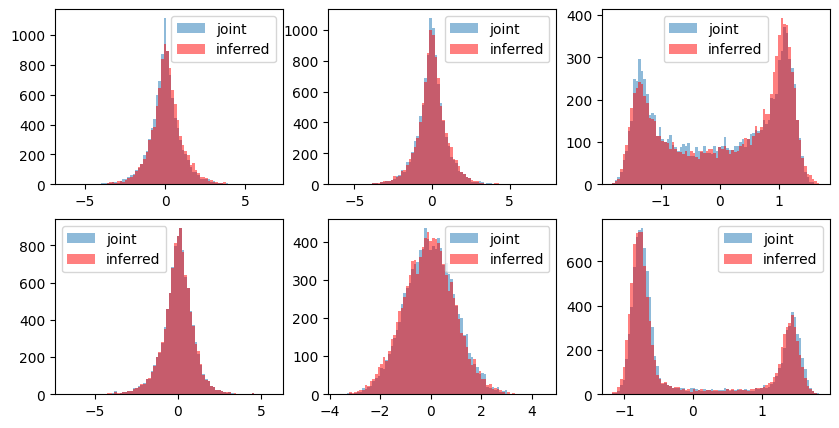

In [69]:
fig, axs = plt.subplots(2,3, figsize=(10,5))
for i,(z,z_) in enumerate(zip(all_z_batches,all_z_batches_hat)):
    col = i % 3
    row = 0 if i <= 2 else 1
    _ ,bins, _ = axs[row,col].hist(onp.array(z), bins = 80, alpha=0.5, label='joint')
    _ = axs[row,col].hist(onp.array(z_), bins = bins, alpha=0.5, color='red', label='inferred')
    axs[row,col].legend()



<AxesSubplot: ylabel='Count'>

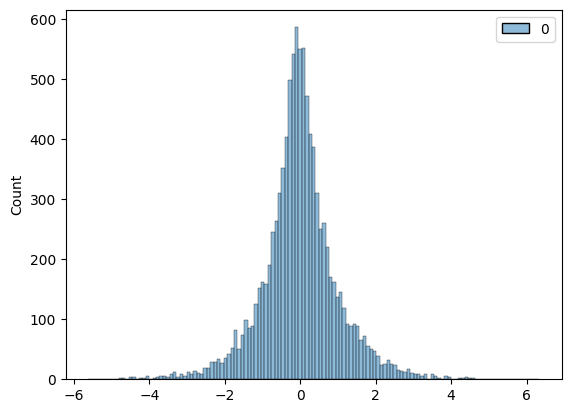

In [8]:
sns.histplot(z_)